<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>


<h1 align='center'>Лекция 3. Решение задач при помощи NumPy, SciPy, Matplotlib</h1>

In [1]:
# подключение модулей NumPy и Matplotlib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Пример 0. Найти уравнение параболы по трем точкам

In [2]:
# подключение NumPy Random для генерации псевдослучайных чисел

import numpy.random as npr

In [3]:
# сгенерировать массив из 3 точек на плоскости

pts = npr.rand(3, 2)*100
pts

array([[36.88300207, 51.08662486],
       [15.77754084, 38.32243666],
       [45.16524501, 15.61132584]])

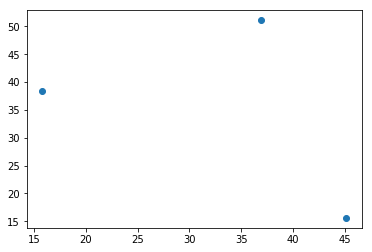

In [4]:
# отрисовать точки

plt.scatter(pts[:,0], pts[:,1])

In [5]:
# подставив координаты трех точек в уравнение параболы a*x^2 + b*x + c = y
# составить систему трех уравнений (СЛАУ) относительно a, b, c

# [[x0^2, x0, 1],   [[a],   [[y0],
#  [x1^2, x1, 1], *  [b], =  [y1],
#  [x2^2, x2, 1]]    [c]]    [y2]]

In [6]:
# матрица СЛАУ

A = np.vstack((pts[:,0]**2, pts[:,0], [1]*3)).T
A

array([[1.36035584e+03, 3.68830021e+01, 1.00000000e+00],
       [2.48930795e+02, 1.57775408e+01, 1.00000000e+00],
       [2.03989936e+03, 4.51652450e+01, 1.00000000e+00]])

In [7]:
# решить СЛАУ и получить коэффициенты a,b,c

a,b,c = np.linalg.solve(A, pts[:,1])
a,b,c

(-0.1663307002300986, 9.363846274384066, -68.01119694171676)

In [8]:
# сгенерировать набор промежуточных значений между минимальной и максимальной координатой по оси x

x = np.linspace(pts[:,0].min(), pts[:,0].max(), 100)
x.shape

(100,)

In [9]:
# рассчитать координаты по оси y для полученной параболы

y = a*x**2+b*x+c

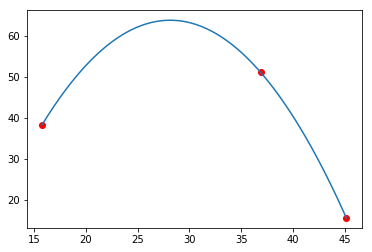

In [10]:
# отрисовать исходные точки и параболу
# проверить, что парабола проходит через точки

plt.scatter(pts[:,0], pts[:,1], color='r')
plt.plot(x, y)

In [11]:
# те же коэффициенты a,b,c можно получить при помощи polyfit

np.polyfit(pts[:,0], pts[:,1], 2)-np.array([a,b,c])

array([ 4.71844785e-16, -3.01980663e-14,  3.12638804e-13])

## Пример 1. Найти уравнение окружности по трем точкам

In [12]:
# идея метода следующая:
# построить два отрезка, соединяющие точки 0-1 и 1-2
# в центрах этих отрезков восстановить перпендикуляры,
# которые пересекутся в центре окружности

In [13]:
# рассчитать коэффициенты k,b прямых y=k*x+b, проходящих через точки 0-1 и 1-2 

k1, b1 = np.polyfit(pts[:2,0], pts[:2,1], 1)
k2, b2 = np.polyfit(pts[1:,0], pts[1:,1], 1)

In [14]:
# рассчитать центры отрезков 0-1 и 1-2

c1 = np.mean(pts[:2], axis=0)
c2 = np.mean(pts[1:], axis=0)

In [15]:
# рассчитать коэффициенты k,b для перпендикуляров, проходящих через центры отрезков
# k_ = -1/k, где k_ - коэфф. при x для линии, перпендикулярной той, у которой коэфф. при x равен k

k_1 = -1/k1
k_2 = -1/k2
b_1 = c1[1] - k_1*c1[0]
b_2 = c2[1] - k_2*c2[0]
b_1, b_2

(88.2413788985337, -12.462466273024141)

(14.298299005450676, 46.64448685263392, 5.243341549557911, 64.86336961752713)

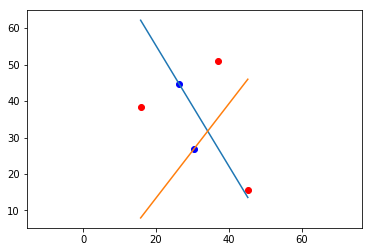

In [16]:
# отрисовать точки, центры отрезков и перпендикуляры

plt.scatter(pts[:,0], pts[:,1], color='r')
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color='b')
plt.plot(x, k_1*x+b_1)
plt.plot(x, k_2*x+b_2)
plt.axis('equal')

In [17]:
# для расчета точки пересечения перпендикуляров
# составить систему линейных уравнений относительно x,y

A = np.array([[k_1, -1.],
              [k_2, -1.]])
B = np.array([-b_1, -b_2])
x_c, y_c = np.linalg.solve(A, B)
x_c, y_c

(34.16620488796829, 31.747890935050133)

In [18]:
# вычислить радиус окружности

r = np.linalg.norm(pts[0,:]-np.array([x_c, y_c]))
r

19.528635813764918

In [19]:
np.append(pts[:,0],[x_c])

array([36.88300207, 15.77754084, 45.16524501, 34.16620489])

(14.298299005450676, 46.64448685263392, 5.243341549557911, 64.86336961752713)

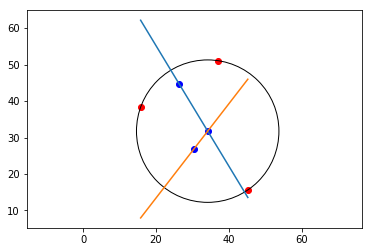

In [20]:
# отрисовать точки, центры отрезков, перпендикуляры, центр окружности и саму окружность

x = np.linspace(np.append(pts[:,0],[x_c]).min(), np.append(pts[:,0],[x_c]).max(), 100)
plt.scatter(pts[:,0], pts[:,1], color='r')
plt.scatter([c1[0], c2[0], x_c], [c1[1], c2[1], y_c], color='b')
plt.plot(x, k_1*x+b_1)
plt.plot(x, k_2*x+b_2)
circ = plt.Circle((x_c, y_c), r, facecolor='none', edgecolor='k')
ax = plt.gca()
ax.add_artist(circ)
plt.axis('equal')

## Пример 2. Посчитать длину ломаной линии

In [21]:
line = npr.rand(100, 2)
d = line[1:]-line[:-1]
d.shape

(99, 2)

In [22]:
np.sum(np.sqrt(np.sum((line[1:]-line[:-1])**2, axis=1)))

55.39431337872067

## Пример 3. Посчитать объем под поверхностью, заданной набором значений на регулярной решетке

## Пример 4. Преобразовать рисунок, наложить маску

In [23]:
# загрузить изображение из файла
# видно, что изображение имеет разрешение 543x530 точек
# и три слоя - R,G,B

img = plt.imread('Futurama.jpg')
type(img), img.shape

(numpy.ndarray, (543, 530, 3))

In [24]:
# при помощи этого метода можно посмотреть названия всех имеющихся цветовых шкал

plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

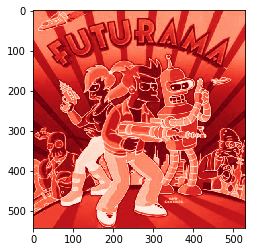

In [25]:
# отобразить слой R при помощи цветовой шкалы 'Reds'

plt.imshow(img[:,:,0], cmap='Reds')

In [26]:
# циклически сдвинуть изображение на половину ширины
# сохранить результат в новой переменной

img1 = np.roll(img, img.shape[1]//2, axis=1)
img1.shape

(543, 530, 3)

In [27]:
# создать еще один слой - alpha-слой (слой прозрачности)
# и заполнить его значением 255 (полностью непрозрачный)
# для пикселей в диапазоне 100-200 по обеим осям установить значение alpha = 100

alpha = np.zeros_like(img[:,:,0])+255
alpha[100:200, 100:200]=100

In [28]:
# в слое R обнулить все пиксели, значение которых больше 100 (слишком красные)

img1[img1[:,:,0]>100,0]=0

In [29]:
# объединить измененные слои и слой alpha в единый массив из четырех слоев

img1 = np.stack((img1[:,:,0],img1[:,:,1],img1[:,:,2],alpha), axis=2)

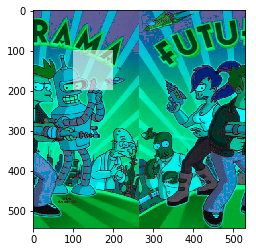

In [30]:
# отрисовать полученное изображение

plt.imshow(img1)

In [31]:
# сохранить результирующее изображение в файл

plt.imsave('Futurama_edited.png', img1)

## Вопросы и дополнения к лекции


[Scientific Python Lectures](https://github.com/jrjohansson/scientific-python-lectures)

[100 Numpy Exercises](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.ipynb)